In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from collections import Counter
import os

In [2]:
df=pd.read_csv("e-commerce.csv")

In [3]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

# Pertama, kami akan mengubah nama kolom menjadi lowercase.

In [4]:
df.columns = df.columns.str.lower()
df.columns

Index(['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category_1',
       'product_category_2', 'product_category_3', 'purchase'],
      dtype='object')

In [5]:
df.shape

(47015, 12)

# Di dataset ini, kami memiliki 47015 baris dan 12 kolom

In [6]:
df.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0.0,8.0,NaN,NaN,7969.0


# Di dalam "Product_Category_2" dan "Product_Category_3", terdapat null values.

In [7]:
df.tail()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
47010,1001228,P00111942,M,26-35,1,C,4+,1.0,8.0,17.0,NaN,10002.0
47011,1001228,P00057742,M,26-35,1,C,4+,1.0,2.0,8.0,18.0,12742.0
47012,1001228,P00324942,M,26-35,1,C,4+,1.0,5.0,NaN,NaN,5363.0
47013,1001228,P00035942,M,26-35,1,C,4+,1.0,1.0,5.0,18.0,11642.0
47014,1001228,P00216142,M,26-35,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47015 entries, 0 to 47014
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_id                     47015 non-null  int64  
 1   product_id                  47015 non-null  object 
 2   gender                      47015 non-null  object 
 3   age                         47015 non-null  object 
 4   occupation                  47015 non-null  int64  
 5   city_category               47014 non-null  object 
 6   stay_in_current_city_years  47014 non-null  object 
 7   marital_status              47014 non-null  float64
 8   product_category_1          47014 non-null  float64
 9   product_category_2          32273 non-null  float64
 10  product_category_3          14287 non-null  float64
 11  purchase                    47014 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 4.3+ MB


# Disini dapat dilihat bahwa occupation adalah integer, seharusnya berbentuk string, maka kita harus merubah tipe datanya.
# Selanjutnya, kita dapat mengubah Product_Category_2 dan Product_Category_3 ke bentuk integer.

In [9]:
df.isna().any()

user_id                       False
product_id                    False
gender                        False
age                           False
occupation                    False
city_category                  True
stay_in_current_city_years     True
marital_status                 True
product_category_1             True
product_category_2             True
product_category_3             True
purchase                       True
dtype: bool

# Kami memiliki nilai "na" dalam city_category, stay_in_current_city_years, marital_status, Product_Category_1, Product_Category_2, Product_Category_3, terakhir purchase.

In [10]:
df.isnull().sum()

user_id                           0
product_id                        0
gender                            0
age                               0
occupation                        0
city_category                     1
stay_in_current_city_years        1
marital_status                    1
product_category_1                1
product_category_2            14742
product_category_3            32728
purchase                          1
dtype: int64

# Disini kami memiliki nilai null pada city_category (1) , stay_in_current_city_years (1), marital_status (1), Product_Category_1 (1), Product_Category_2 (14742), Product_Category_3 (32728), terakhir purchase (1).

In [11]:
df["city_category"].value_counts(dropna=False)

B      19489
C      14411
A      13114
NaN        1
Name: city_category, dtype: int64

In [12]:
df["stay_in_current_city_years"].value_counts(dropna=False)

1      16248
2       8716
3       8213
4+      7342
0       6495
NaN        1
Name: stay_in_current_city_years, dtype: int64

In [13]:
df["marital_status"].value_counts(dropna=False)

0.0    27758
1.0    19256
NaN        1
Name: marital_status, dtype: int64

In [14]:
df["product_category_1"].value_counts(dropna=False)

5.0     13252
1.0     11916
8.0      9931
11.0     2155
2.0      2049
3.0      1720
6.0      1706
4.0       983
16.0      815
15.0      527
13.0      440
10.0      431
12.0      314
7.0       299
18.0      243
14.0      147
17.0       51
9.0        35
NaN         1
Name: product_category_1, dtype: int64

In [15]:
df["product_category_2"].value_counts(dropna=False)

NaN     14742
8.0      5505
14.0     4837
2.0      4129
16.0     3678
15.0     3205
5.0      2209
4.0      2181
6.0      1439
11.0     1211
17.0     1162
13.0      904
9.0       529
12.0      499
10.0      255
3.0       244
18.0      236
7.0        50
Name: product_category_2, dtype: int64

In [16]:
df["product_category_3"].value_counts(dropna=False)

NaN     32728
16.0     2853
15.0     2372
14.0     1559
17.0     1508
5.0      1399
8.0      1036
9.0       990
12.0      816
13.0      459
6.0       414
18.0      367
4.0       170
11.0      153
10.0      133
3.0        58
Name: product_category_3, dtype: int64

In [17]:
df["purchase"].value_counts(dropna=False)

7075.0     28
7089.0     26
8021.0     25
7989.0     24
8044.0     24
           ..
5774.0      1
1391.0      1
18488.0     1
12227.0     1
13614.0     1
Name: purchase, Length: 11545, dtype: int64

# Sekarang kita mengganti "0" untuk null values.

In [18]:
df.fillna(0,inplace=True)
df.isnull().sum()

user_id                       0
product_id                    0
gender                        0
age                           0
occupation                    0
city_category                 0
stay_in_current_city_years    0
marital_status                0
product_category_1            0
product_category_2            0
product_category_3            0
purchase                      0
dtype: int64

In [19]:
df["occupation"]=df["occupation"].astype("object")
df.marital_status=df.marital_status.astype("object")
df.product_category_2=df.product_category_2.astype(int)
df.product_category_3=df.product_category_3.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47015 entries, 0 to 47014
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_id                     47015 non-null  int64  
 1   product_id                  47015 non-null  object 
 2   gender                      47015 non-null  object 
 3   age                         47015 non-null  object 
 4   occupation                  47015 non-null  object 
 5   city_category               47015 non-null  object 
 6   stay_in_current_city_years  47015 non-null  object 
 7   marital_status              47015 non-null  object 
 8   product_category_1          47015 non-null  float64
 9   product_category_2          47015 non-null  int32  
 10  product_category_3          47015 non-null  int32  
 11  purchase                    47015 non-null  float64
dtypes: float64(2), int32(2), int64(1), object(7)
memory usage: 3.9+ MB


In [20]:
df.dtypes

user_id                         int64
product_id                     object
gender                         object
age                            object
occupation                     object
city_category                  object
stay_in_current_city_years     object
marital_status                 object
product_category_1            float64
product_category_2              int32
product_category_3              int32
purchase                      float64
dtype: object

# Kami memiliki 7 strings, 2 integer dan 2 float.

In [21]:

df.loc[:,["product_category_1","product_category_2","product_category_3","purchase"]].describe()

,product_category_1,product_category_2,product_category_3,purchase
count,47015.000000,47015.000000,47015.000000,47015.000000
mean,5.300542,6.780772,3.862576,9288.246921
std,3.715752,6.215472,6.271965,4950.922314
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,5863.000000
50%,5.000000,6.000000,0.000000,8048.000000
75%,8.000000,14.000000,8.000000,12033.000000
max,18.000000,18.000000,18.000000,23958.000000


In [22]:
df.columns

Index(['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category_1',
       'product_category_2', 'product_category_3', 'purchase'],
      dtype='object')

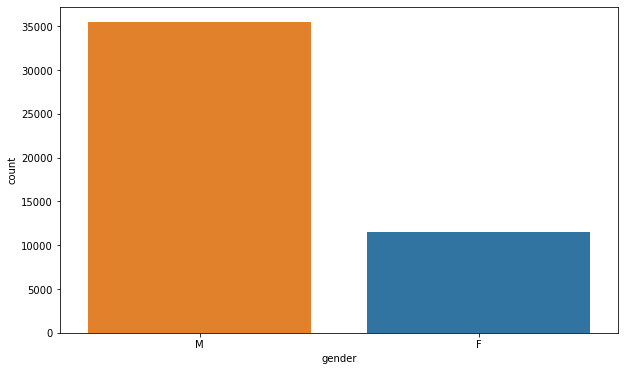

In [23]:
f,ax=plt.subplots(figsize=(10,6))
sb.countplot(df.gender)
plt.gca().invert_xaxis()
plt.show()

# Disini dapat dilihat bahwa Pria lebih banyak berbelanja di e-commerce

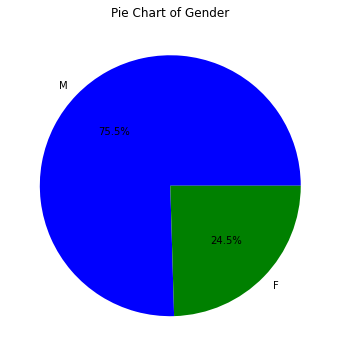

In [24]:
plt.figure(figsize=(10,6))
plt.pie(df.gender.value_counts().values,explode=(0,0),labels=df.gender.value_counts().index,colors=("blue","green"),autopct="%1.1f%%")
plt.title("Pie Chart of Gender")
plt.show()

# Dapat dilihat juga persentase untuk pria 75.5% dan wanita 24.5%

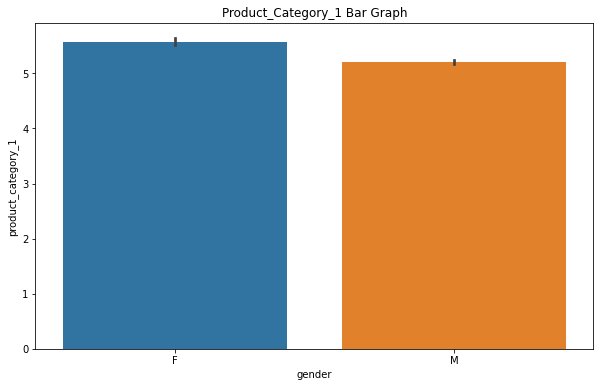

In [25]:
f,ax=plt.subplots(figsize=(10,6))
sb.barplot(x=df.gender,y=df.product_category_1,data=df)
plt.title("Product_Category_1 Bar Graph")
plt.show()

# Dapat dilihat bahwa pembelian wanita lebih banyak pada product_category_1.

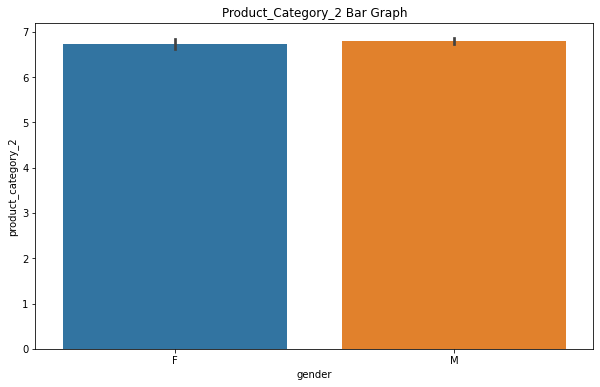

In [26]:
f,ax=plt.subplots(figsize=(10,6))
sb.barplot(x=df.gender,y=df.product_category_2,data=df)
plt.title("Product_Category_2 Bar Graph")
plt.show()

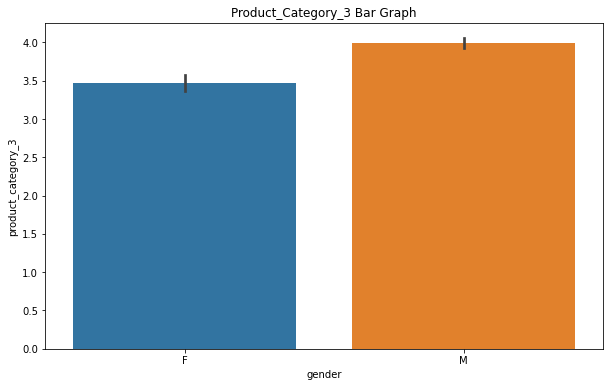

In [27]:
f,ax=plt.subplots(figsize=(10,6))
sb.barplot(x=df.gender,y=df.product_category_3,data=df)
plt.title("Product_Category_3 Bar Graph")
plt.show()

# Dapat dilihat bahwa pria lebih banyak berbelanja pada product_category_3.

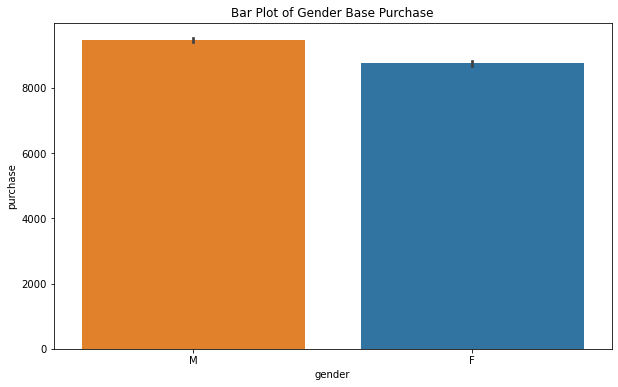

In [28]:
f,ax=plt.subplots(figsize=(10,6))
ax=sb.barplot(x="gender",y="purchase",data=df,ax=ax)
plt.title("Bar Plot of Gender Base Purchase")
plt.gca().invert_xaxis()
plt.show()

In [29]:
df.columns

Index(['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category_1',
       'product_category_2', 'product_category_3', 'purchase'],
      dtype='object')

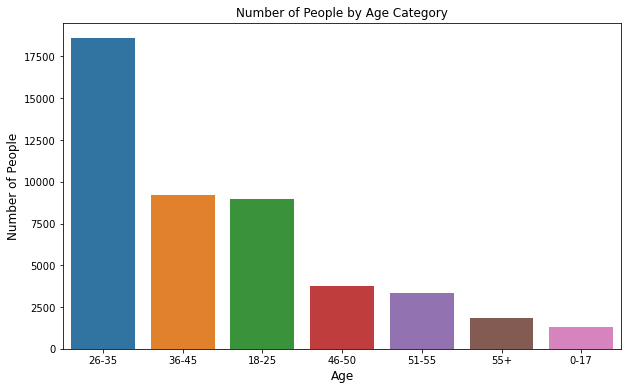

In [30]:
f,ax=plt.subplots(figsize=(10,6))
df_age_sorted=df.age.value_counts()
sb.barplot(x=df_age_sorted.index,y=df_age_sorted.values)
plt.title("Number of People by Age Category")
plt.xlabel("Age",size=12)
plt.ylabel("Number of People",size=12)
plt.show()

# Kita lihat bahwa kebanyakan grup umur 26-35 membeli lebih banyak produk pada e-commerce+  

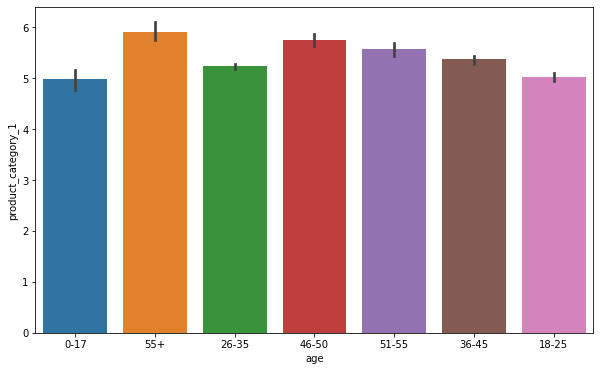

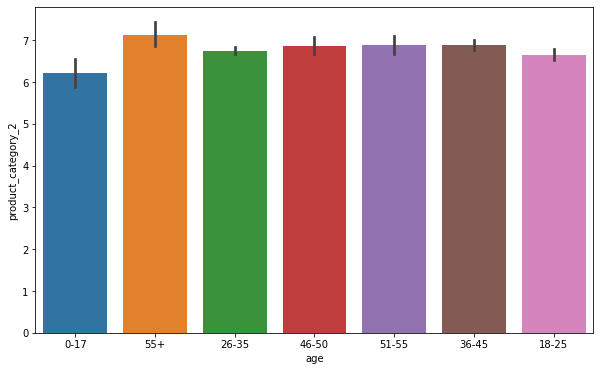

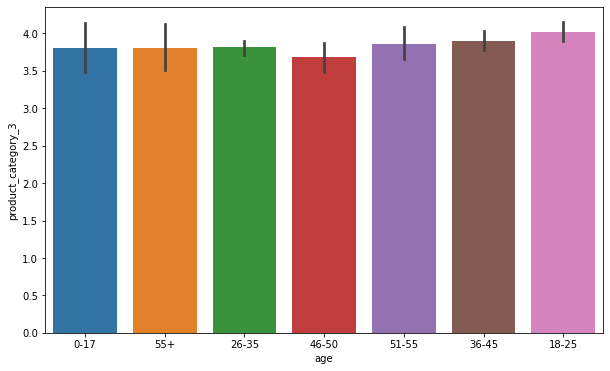

In [31]:
f,ax=plt.subplots(figsize=(10,6))
sb.barplot(x=df.age,y=df.product_category_1)
f,ax=plt.subplots(figsize=(10,6))
sb.barplot(x=df.age,y=df.product_category_2)
f,ax=plt.subplots(figsize=(10,6))
sb.barplot(x=df.age,y=df.product_category_3)
plt.show()

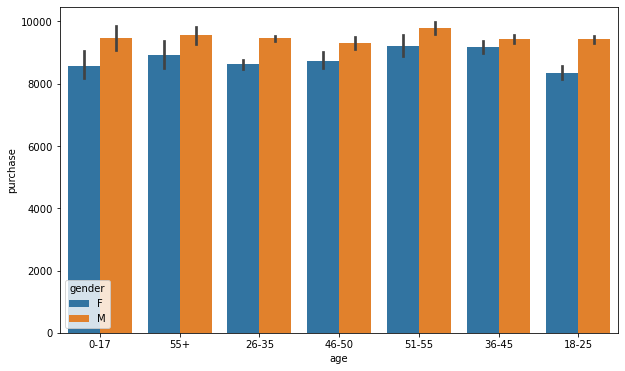

In [32]:
f,ax=plt.subplots(figsize=(10,6))
sb.barplot(x=df.age,y=df.purchase,hue=df.gender)
plt.show()

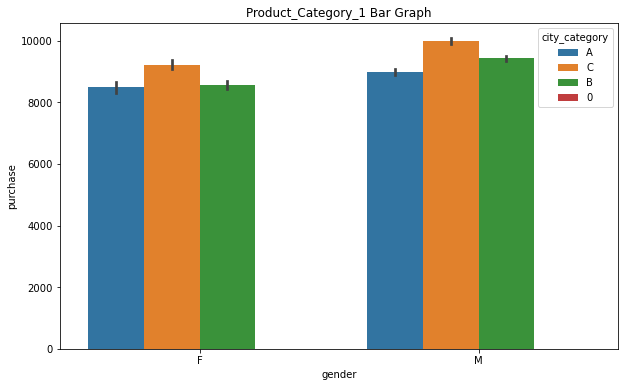

In [33]:
f,ax=plt.subplots(figsize=(10,6))
sb.barplot(x=df.gender,y=df.purchase,hue=df.city_category)
plt.title("Product_Category_1 Bar Graph")
plt.show()

# Kita lihat bahwa wanita membeli lebih banyak pada product_category_1

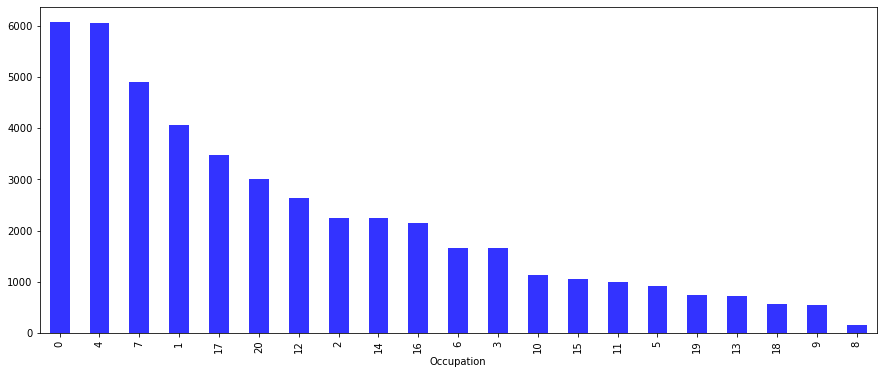

In [34]:
df.occupation.value_counts().plot(kind="bar",color="b",alpha=.8,figsize=(15,6))
plt.xlabel("Occupation")
plt.show()

# Kita lihat disini occupations nomor 0 dan 4 adalah pembeli yang paling banyak

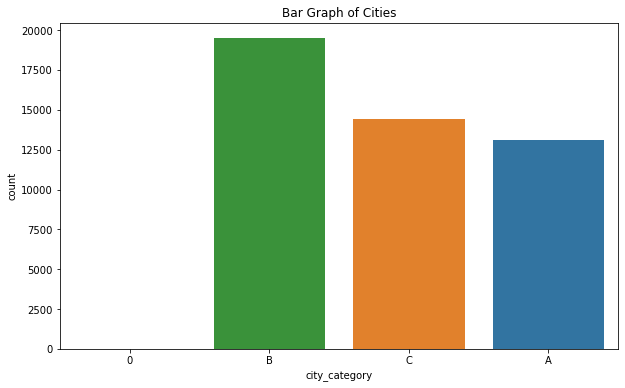

In [35]:

f,ax=plt.subplots(figsize=(10,6))
sb.countplot(df.city_category)
plt.title("Bar Graph of Cities")
plt.gca().invert_xaxis()
plt.show()

# Di kota B, pelanggan membeli lebih banyak produk dibandingkan dengan kota C dan A

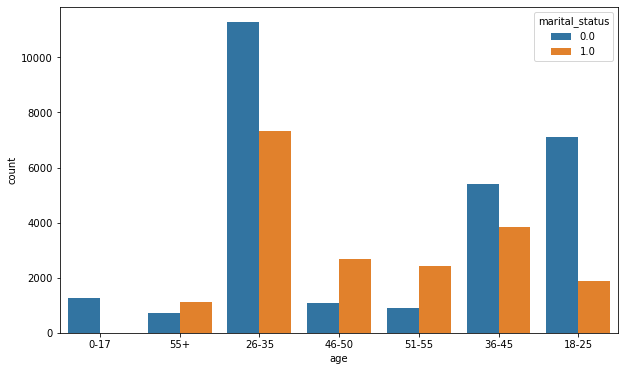

In [36]:
f,ax=plt.subplots(figsize=(10,6))
sb.countplot(x=df.age,hue=df.marital_status)
plt.show()

# Maried couple menghabiskan lebih sedikit uang pada pembelian produk dibandingkan dengan single people.

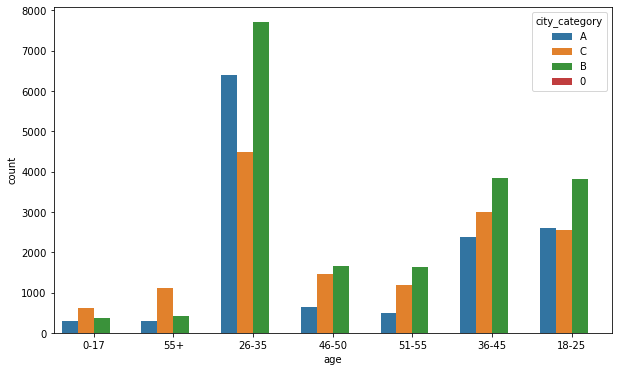

In [37]:
f,ax=plt.subplots(figsize=(10,6))
sb.countplot(x=df.age,hue=df.city_category)
plt.show()

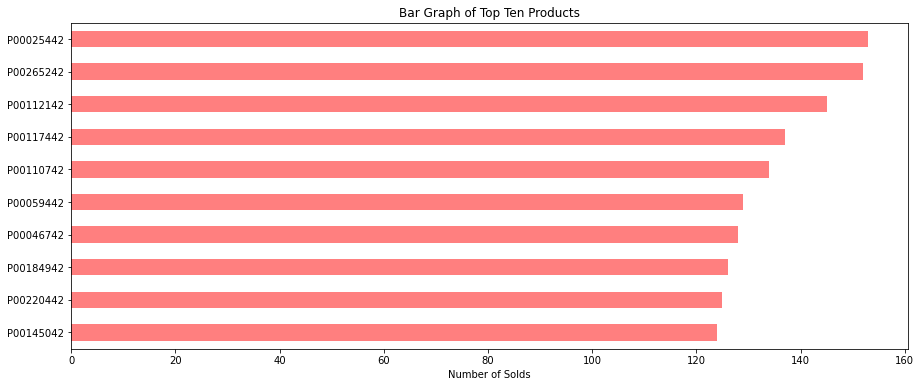

In [38]:
plt.rcParams["axes.facecolor"]="w"
df["product_id"].value_counts()[:10].plot(kind="barh",color="r",alpha=.5,figsize=(15,6))
plt.title("Bar Graph of Top Ten Products")
plt.xlabel("Number of Solds")
plt.gca().invert_yaxis()
plt.show()

In [39]:
df.loc[:,["product_category_1","product_category_2","product_category_3","purchase"]].corr()

,product_category_1,product_category_2,product_category_3,purchase
product_category_1,1.000000,-0.042542,-0.389863,-0.319334
product_category_2,-0.042542,1.000000,0.098330,0.043232
product_category_3,-0.389863,0.098330,1.000000,0.289723
purchase,-0.319334,0.043232,0.289723,1.000000


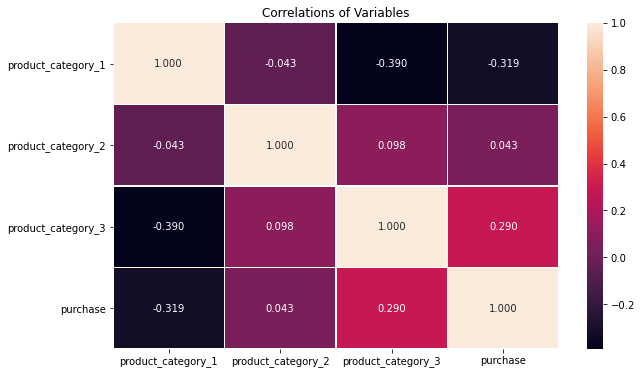

In [40]:
f,ax=plt.subplots(figsize=(10,6))
sb.heatmap(df.loc[:,["product_category_1","product_category_2","product_category_3","purchase"]].corr(),annot=True,linewidth=.5,fmt=".3f",ax=ax)
plt.title("Correlations of Variables")
plt.show()

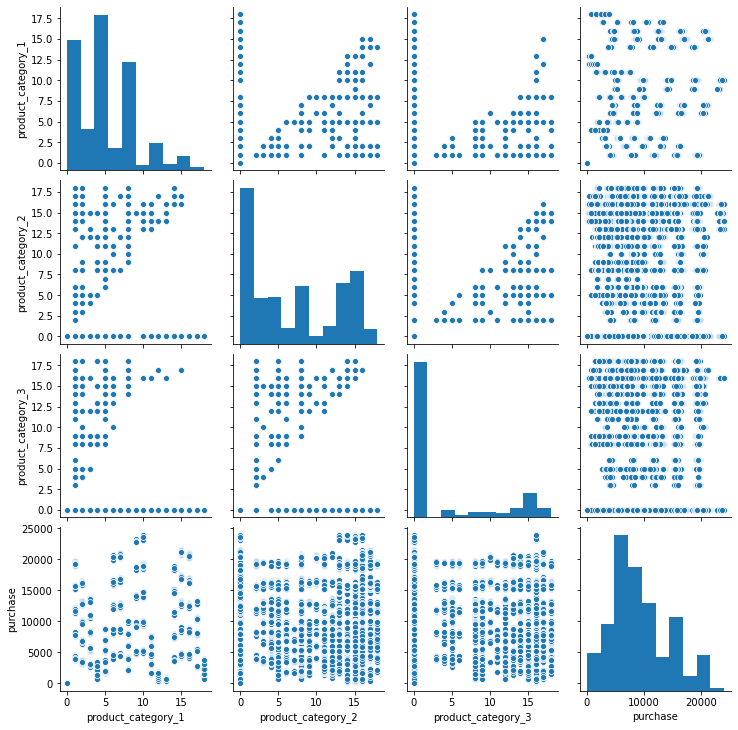

In [41]:
sb.pairplot(df.loc[:,["product_category_1","product_category_2","product_category_3","purchase"]])
plt.show()

C:\Users\ITD-STU\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


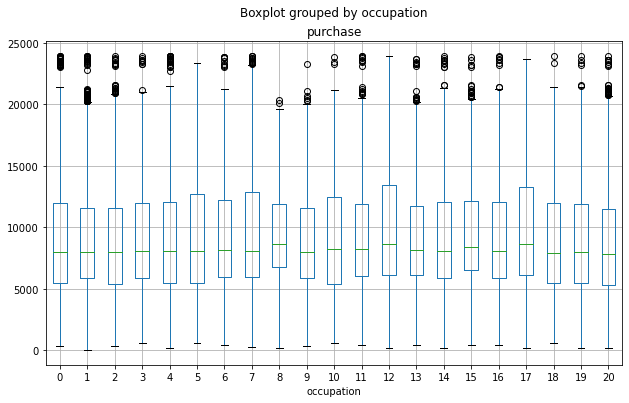

In [42]:
df.boxplot(column="purchase",by="occupation",figsize=(10,6))
plt.show()

# Terdapat outliers di hampir setiap occupations group ini.

C:\Users\ITD-STU\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


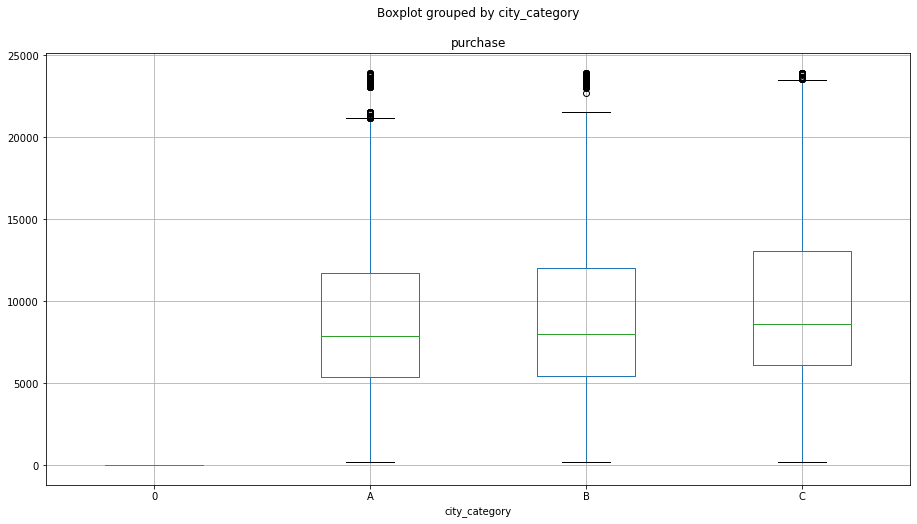

In [43]:
df.boxplot(column="purchase",by="city_category",figsize=(15,8))
plt.show()

# Terdapat outliers juga di kota A, B dan C

C:\Users\ITD-STU\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


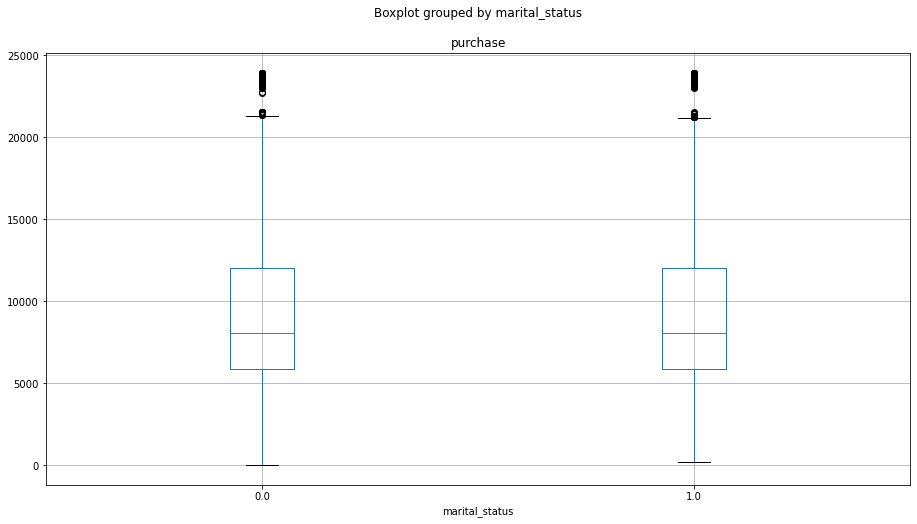

In [44]:
df.boxplot(column="purchase",by="marital_status",figsize=(15,8))
plt.show()

# Terdapat outliers di setiap grup pada marital_status

C:\Users\ITD-STU\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


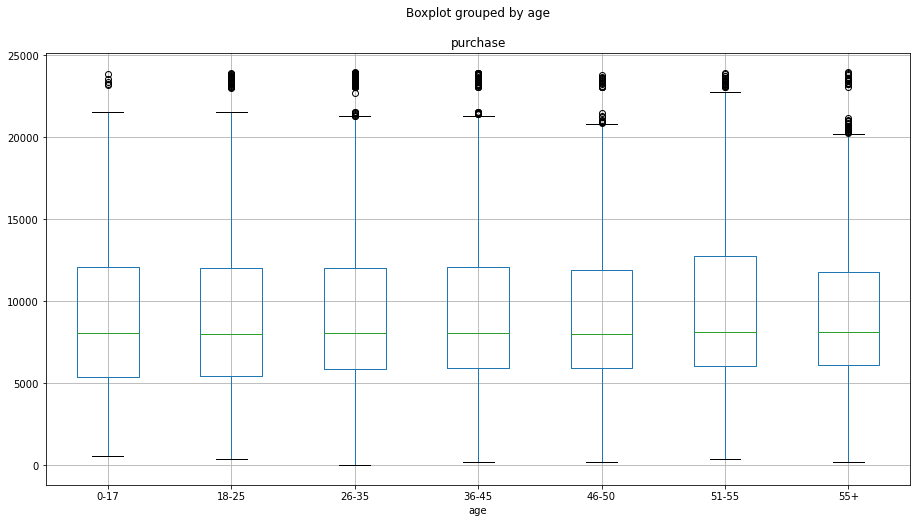

In [45]:
df.boxplot(column="purchase",by="age",figsize=(15,8))
plt.show()

In [46]:
df_product_category_1_normalize=(df.product_category_1-df.product_category_1.mean())/df.product_category_1.std()
df_product_category_2_normalize=(df.product_category_2-df.product_category_2.mean())/df.product_category_2.std()
df_product_category_3_normalize=(df.product_category_3-df.product_category_3.mean())/df.product_category_3.std()
df_purchase_normalize=(df.purchase-df.purchase.mean())/df.purchase.std()
# Sekarang, kami akan me-Normalisasi nilainya.

normalize_data=pd.concat([df_product_category_1_normalize,df_product_category_2_normalize,df_product_category_3_normalize,df_purchase_normalize]
                         ,axis=1)
normalize_data.head()

,product_category_1,product_category_2,product_category_3,purchase
0,-0.619132,-1.090950,-0.615848,-0.185470
1,-1.157382,-0.125617,1.616308,1.194071
2,1.802989,-1.090950,-0.615848,-1.588845
3,1.802989,1.161493,-0.615848,-1.662568
4,0.726490,-1.090950,-0.615848,-0.266465


# DATA CLEANING

In [48]:
#check missing value

round (df.isnull().sum()/ len(df) * 100, 4)

user_id                       0.0
product_id                    0.0
gender                        0.0
age                           0.0
occupation                    0.0
city_category                 0.0
stay_in_current_city_years    0.0
marital_status                0.0
product_category_1            0.0
product_category_2            0.0
product_category_3            0.0
purchase                      0.0
dtype: float64

# Tidak ada missing value, karena data sudah dibersihkan di awal EDA di atas

In [50]:
df

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,0,0,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1.0,6,14,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12.0,0,0,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12.0,14,0,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8.0,0,0,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
47010,1001228,P00111942,M,26-35,1,C,4+,1,8.0,17,0,10002.0
47011,1001228,P00057742,M,26-35,1,C,4+,1,2.0,8,18,12742.0
47012,1001228,P00324942,M,26-35,1,C,4+,1,5.0,0,0,5363.0
47013,1001228,P00035942,M,26-35,1,C,4+,1,1.0,5,18,11642.0


In [51]:
# change data to dataframe
data_df = pd.DataFrame(df)
print (data_df)

       user_id product_id gender    age occupation city_category  \
0      1000001  P00069042      F   0-17         10             A   
1      1000001  P00248942      F   0-17         10             A   
2      1000001  P00087842      F   0-17         10             A   
3      1000001  P00085442      F   0-17         10             A   
4      1000002  P00285442      M    55+         16             C   
...        ...        ...    ...    ...        ...           ...   
47010  1001228  P00111942      M  26-35          1             C   
47011  1001228  P00057742      M  26-35          1             C   
47012  1001228  P00324942      M  26-35          1             C   
47013  1001228  P00035942      M  26-35          1             C   
47014  1001228  P00216142      M  26-35          1             0   

      stay_in_current_city_years marital_status  product_category_1  \
0                              2              0                 3.0   
1                              2         

In [52]:
print(df.shape)

(47015, 12)


In [54]:
# drop missing value
data_dropna = df.dropna()
print(data_dropna.shape)

(47015, 12)


In [55]:
print(data_dropna)

       user_id product_id gender    age occupation city_category  \
0      1000001  P00069042      F   0-17         10             A   
1      1000001  P00248942      F   0-17         10             A   
2      1000001  P00087842      F   0-17         10             A   
3      1000001  P00085442      F   0-17         10             A   
4      1000002  P00285442      M    55+         16             C   
...        ...        ...    ...    ...        ...           ...   
47010  1001228  P00111942      M  26-35          1             C   
47011  1001228  P00057742      M  26-35          1             C   
47012  1001228  P00324942      M  26-35          1             C   
47013  1001228  P00035942      M  26-35          1             C   
47014  1001228  P00216142      M  26-35          1             0   

      stay_in_current_city_years marital_status  product_category_1  \
0                              2              0                 3.0   
1                              2         

In [56]:
#recheck missing value
round (data_dropna.isnull().sum()/ len(data_dropna) * 100, 4)

user_id                       0.0
product_id                    0.0
gender                        0.0
age                           0.0
occupation                    0.0
city_category                 0.0
stay_in_current_city_years    0.0
marital_status                0.0
product_category_1            0.0
product_category_2            0.0
product_category_3            0.0
purchase                      0.0
dtype: float64

In [58]:
df[['product_category_2', 'product_category_3']].isnull().sum()

product_category_2    0
product_category_3    0
dtype: int64

In [59]:
data_dropna[['product_category_2', 'product_category_3']].isnull().sum()

product_category_2    0
product_category_3    0
dtype: int64

# DATA REDUCTION

In [64]:
product = data_dropna

In [65]:
product

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,0,0,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1.0,6,14,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12.0,0,0,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12.0,14,0,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8.0,0,0,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
47010,1001228,P00111942,M,26-35,1,C,4+,1,8.0,17,0,10002.0
47011,1001228,P00057742,M,26-35,1,C,4+,1,2.0,8,18,12742.0
47012,1001228,P00324942,M,26-35,1,C,4+,1,5.0,0,0,5363.0
47013,1001228,P00035942,M,26-35,1,C,4+,1,1.0,5,18,11642.0


In [66]:
# Drop irrelevant attributes
product = product.drop('city_category', axis=1)
product = product.drop('stay_in_current_city_years', axis=1)

In [67]:
product

,user_id,product_id,gender,age,occupation,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,0,3.0,0,0,8370.0
1,1000001,P00248942,F,0-17,10,0,1.0,6,14,15200.0
2,1000001,P00087842,F,0-17,10,0,12.0,0,0,1422.0
3,1000001,P00085442,F,0-17,10,0,12.0,14,0,1057.0
4,1000002,P00285442,M,55+,16,0,8.0,0,0,7969.0
...,...,...,...,...,...,...,...,...,...,...
47010,1001228,P00111942,M,26-35,1,1,8.0,17,0,10002.0
47011,1001228,P00057742,M,26-35,1,1,2.0,8,18,12742.0
47012,1001228,P00324942,M,26-35,1,1,5.0,0,0,5363.0
47013,1001228,P00035942,M,26-35,1,1,1.0,5,18,11642.0
